# Data visualization - Pretraining

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_name = 'data/pretraining/temperature_array_list.npy'

# allow_pickle=True is required to load 'object' arrays
try:
    data = np.load(file_name, allow_pickle=True)

    print(f"File loaded. Main shape (list of objects): {data.shape}")
    print(f"Total images (objects) in file: {len(data)}")

    if len(data) > 0 and isinstance(data[0], np.ndarray):
        
        first_image = data[0] # Get the first array (image)
        
        if first_image.size > 0:
            print(f"Displaying first image with shape: {first_image.shape}")

            plt.figure(figsize=(8, 6))
            
            plt.imshow(first_image, cmap='viridis') 
            
            # Add a color bar to show the temperature scale
            plt.colorbar(label='Temperature (K)') 
            
            plt.title(f'First Image Preview (Shape: {first_image.shape})')
            plt.xlabel('Pixel X')
            plt.ylabel('Pixel Y')
            
            plt.show()

            # --- Save the image as a PNG file ---
            # save_path = 'my_first_image.png'
            # plt.imsave(save_path, first_image, cmap='viridis')
            # print(f"Image saved to {save_path}")

        else:
            print("The first image (data[0]) is empty (shape is (0, 0)).")
            
    else:
        print("The file seems to be empty or the first item is not a NumPy array.")


except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Error: The file 'data/pretraining/temperature_array_list.npy' was not found.


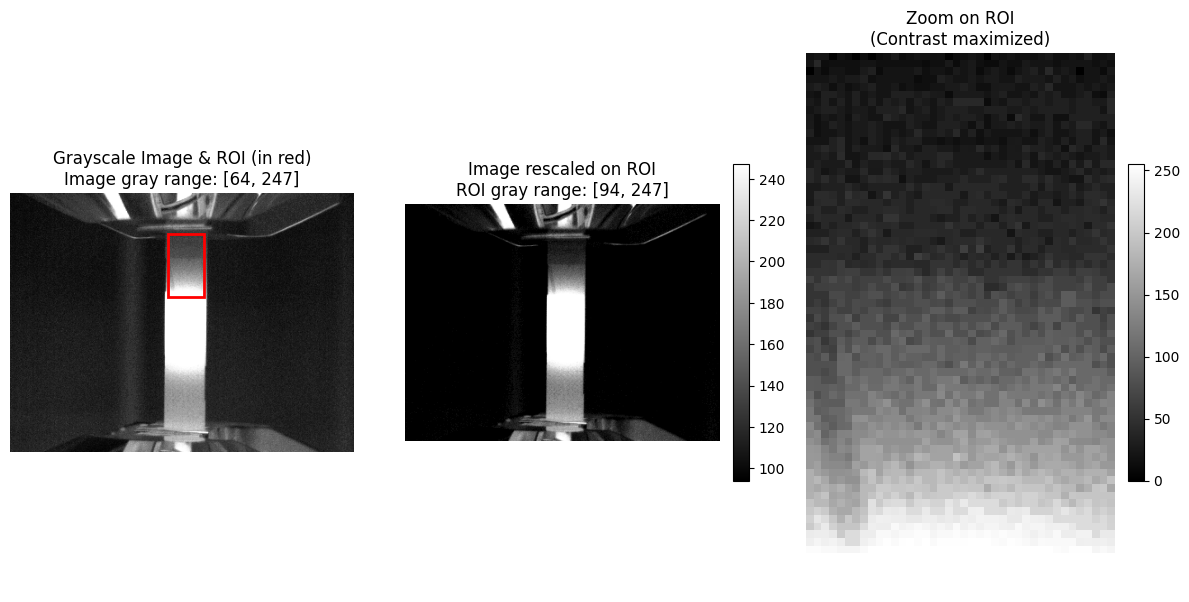

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import os

def plot_grayscale_with_rescaled_roi(image_path: str, rectangle_coords: tuple):
    """
    Loads an image, converts it to grayscale, and displays three plots:
    1. The grayscale image with a red rectangle outlining the ROI.
    2. The grayscale image with its color scale based on the ROI.
    3. A zoom on the ROI with maximized contrast.

    Args:
        image_path (str): The path to the image file.
        rectangle_coords (tuple): A tuple (x, y, width, height) for the ROI.
    """
    try:
        # --- 1. Load and prepare the image ---
        img = Image.open(image_path)
        img_gray = img.convert('L') # Convert to grayscale (Luminance)
        img_gray_np = np.array(img_gray)

        # --- 2. Define the Region of Interest (ROI) ---
        x, y, w, h = rectangle_coords
        roi = img_gray_np[y:y+h, x:x+w]

        if roi.size == 0:
            print("Warning: The defined rectangle is outside the image or has zero size.")
            return

        # --- 3. Calculate the new color scale ---
        vmin = np.min(roi)
        vmax = np.max(roi)

        # --- 4. Create the plots ---
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

        # Left plot: Original image with the rectangle
        ax1.imshow(img_gray_np, cmap='gray')
        rect = patches.Rectangle(
            (x, y), w, h,
            linewidth=2,
            edgecolor='r',
            facecolor='none'
        )
        ax1.add_patch(rect)
        ax1.set_title(f"Grayscale Image & ROI (in red)\nImage gray range: [{np.min(img_gray_np)}, {np.max(img_gray_np)}]")
        ax1.axis('off') # Hide axes

        # Middle plot: Rescaled image
        im = ax2.imshow(img_gray_np, cmap='gray', vmin=vmin, vmax=vmax)
        ax2.set_title(f"Image rescaled on ROI\nROI gray range: [{vmin}, {vmax}]")
        ax2.axis('off')

        # Right plot: Zoom on ROI
        roi = (roi - vmin)/(vmax-vmin) * 255
        im2 = ax3.imshow(roi, cmap='gray')
        ax3.set_title(f"Zoom on ROI\n(Contrast maximized)")
        ax3.axis('off') # Hide axes

        # Add a color bar to better visualize the scale
        fig.colorbar(im, ax=ax2, orientation='vertical', fraction=0.046, pad=0.04)
        fig.colorbar(im2, ax=ax3, orientation='vertical', fraction=0.046, pad=0.04)

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{image_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# --- Example of use ---

# For this example, I will use the provided test image path.
test_image_path = 'data/CFRP_60_low/Record_2025-11-11_10-42-17.tiff'
# Format: (start_x_coordinate, start_y_coordinate, width, height)
# rectangle_to_analyze = (180, 130, 30, 50) 
rectangle_to_analyze = (175,45,40,70)
# rectangle_to_analyze = (180,80,30,140)

# Call the function with your image and the rectangle
plot_grayscale_with_rescaled_roi(test_image_path, rectangle_to_analyze)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


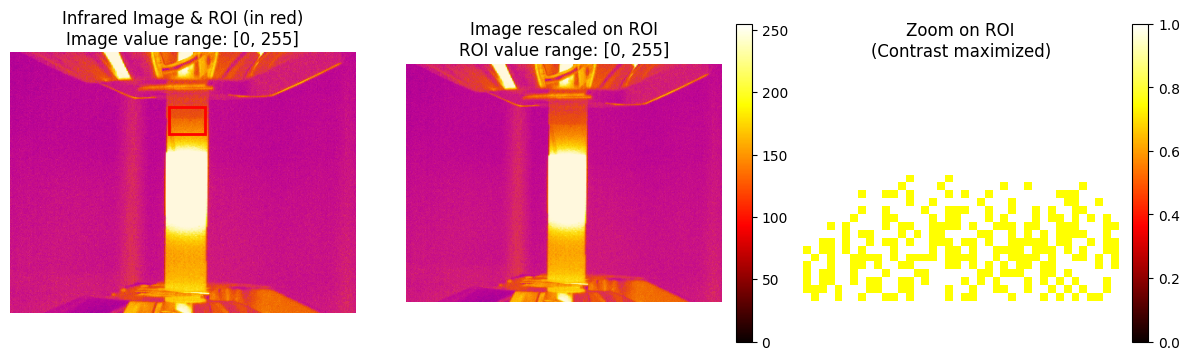

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import os

def plot_infrared_with_rescaled_roi(image_path: str, rectangle_coords: tuple, colormap='hot'):
    """
    Loads an infrared image and displays three plots:
    1. The original image with a red rectangle outlining the ROI.
    2. The image with its color scale based on the ROI.
    3. A zoom on the ROI with maximized contrast.

    Args:
        image_path (str): The path to the image file.
        rectangle_coords (tuple): A tuple (x, y, width, height) for the ROI.
        colormap (str): The colormap to use for displaying the infrared image.
    """
    try:
        # --- 1. Load and prepare the image ---
        img = Image.open(image_path)
        img_np = np.array(img)

        # --- 2. Define the Region of Interest (ROI) ---
        x, y, w, h = rectangle_coords
        roi = img_np[y:y+h, x:x+w]

        if roi.size == 0:
            print("Warning: The defined rectangle is outside the image or has zero size.")
            return

        # --- 3. Calculate the new color scale based on the ROI ---
        vmin = np.min(roi)
        vmax = np.max(roi)

        # --- 4. Create the plots ---
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

        # Left plot: Original image with the rectangle
        ax1.imshow(img_np, cmap=colormap)
        rect = patches.Rectangle(
            (x, y), w, h,
            linewidth=2,
            edgecolor='r',
            facecolor='none'
        )
        ax1.add_patch(rect)
        ax1.set_title(f"Infrared Image & ROI (in red)\nImage value range: [{np.min(img_np)}, {np.max(img_np)}]")
        ax1.axis('off') # Hide axes

        # Middle plot: Rescaled image
        im = ax2.imshow(img_np, cmap=colormap, vmin=vmin, vmax=vmax)
        ax2.set_title(f"Image rescaled on ROI\nROI value range: [{vmin}, {vmax}]")
        ax2.axis('off')

        # Right plot: Zoom on ROI
        roi = (roi - vmin)/(vmax-vmin) * 255
        im2 = ax3.imshow(roi, cmap=colormap)
        ax3.set_title(f"Zoom on ROI\n(Contrast maximized)")
        ax3.axis('off') # Hide axes

        # Add a color bar to better visualize the scale
        fig.colorbar(im, ax=ax2, orientation='vertical', fraction=0.046, pad=0.04)
        fig.colorbar(im2, ax=ax3, orientation='vertical', fraction=0.046, pad=0.04)

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{image_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# --- Example of use ---

# For this example, I will use the provided test image path.
test_image_path = 'data/CFRP_60_low/Record_2025-11-11_10-42-17.tiff'
# Format: (start_x_coordinate, start_y_coordinate, width, height)
# rectangle_to_analyze = (180, 130, 30, 50) 
# rectangle_to_analyze = (180,60,30,180)
rectangle_to_analyze = (175,60,40,30)

# Call the function with your image and the rectangle
plot_infrared_with_rescaled_roi(test_image_path, rectangle_to_analyze)